In [895]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

%run -i 'functions.py'


In [899]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('final1.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [900]:
JFK = df[df['ORIGIN_STATE_ABR'] == 'NY']
JFK

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
1,1,1,24,4,2019-01-24,B6,1323,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1523.0,-5.0,1832.0,-35.0,0.0,336.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
3,1,1,24,4,2019-01-24,B6,1523,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1658.0,26.0,1959.0,-6.0,0.0,333.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
4,1,1,24,4,2019-01-24,B6,1623,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2107.0,83.0,23.0,66.0,0.0,335.0,2475.0,1.0,0.0,0.0,0.0,65.0,True,False,False,2,True,False,False,False,True
5,1,1,24,4,2019-01-24,B6,1723,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2317.0,97.0,326.0,137.0,0.0,344.0,2475.0,0.0,0.0,40.0,0.0,97.0,True,False,False,2,False,False,True,False,True
6,1,1,24,4,2019-01-24,B6,1823,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2237.0,-3.0,215.0,10.0,0.0,343.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25653,4,12,30,1,2019-12-30,B6,1923,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,925.0,-4.0,1236.0,-23.0,0.0,324.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25655,4,12,30,1,2019-12-30,B6,2123,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1440.0,131.0,1755.0,121.0,0.0,335.0,2475.0,121.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25658,4,12,31,2,2019-12-31,B6,23,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,520.0,-10.0,823.0,-33.0,0.0,335.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25660,4,12,31,2,2019-12-31,B6,123,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,651.0,-9.0,1015.0,-18.0,0.0,321.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


# Airport: JFK

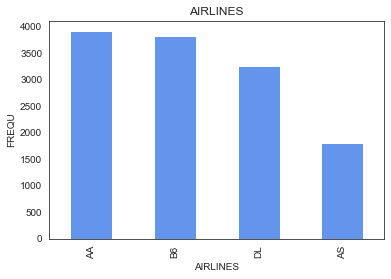

<Figure size 1296x360 with 0 Axes>

In [901]:
Airlines(JFK['OP_UNIQUE_CARRIER'])

In [6]:
JFK['QUARTER'].value_counts()

4    3251
2    3228
1    3188
3    3137
Name: QUARTER, dtype: int64

On average it takes around 330 minutes (5 hours 30 minutes) to fly from JFK to LAX. 

In [13]:
JFK['AIR_TIME'].describe()

count    12804.000000
mean       330.897844
std         35.599230
min          0.000000
25%        320.000000
50%        332.000000
75%        345.000000
max        416.000000
Name: AIR_TIME, dtype: float64

In [17]:
JFK.groupby('OP_UNIQUE_CARRIER').agg({'AIR_TIME': ['mean']})

,AIR_TIME
,mean
OP_UNIQUE_CARRIER,
AA,332.551662
AS,327.134881
B6,333.460592
DL,328.005511


I have identified the flight leaving JFK with the longest air time. The air time was 6 hours and 56 minutes. We we look into it later on.


In [288]:
JFK[JFK['AIR_TIME']==JFK['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
23089,4,11,27,3,2019-11-27,AA,331,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1055.0,-5.0,1539.0,81.0,0.0,416.0,2475.0,0.0,0.0,81.0,0.0,0.0,False,True,False,3,False,False,True,False,False


These are 8 Cancelled flights that were schduled to leave delayed before they were cancelled. JFK had a total of 68 cancelled flights to LAX


In [285]:
late2 =JFK[(JFK['DEP_TIME'] > 0) & (JFK['CANCELLED'] ==1)]
late2

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
5852,1,3,3,7,2019-03-03,B6,1723,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2115.0,-3.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
9818,2,5,28,2,2019-05-28,AS,129,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2015.0,0.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
11453,2,6,2,7,2019-06-02,AS,129,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2015.0,0.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
13161,3,7,6,6,2019-07-06,AA,331,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1347.0,167.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,True,1,False,False,False,False,False
13192,3,7,6,6,2019-07-06,AA,341,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1426.0,-4.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
13477,3,7,6,6,2019-07-06,AA,3,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1616.0,227.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,True,1,False,False,False,False,False
16273,3,8,22,4,2019-08-22,AA,300,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1957.0,-3.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,True,1,False,False,False,False,False
20311,4,10,31,4,2019-10-31,AA,24,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2200.0,30.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,True,1,False,False,False,False,False
21025,4,10,31,4,2019-10-31,AA,247,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2040.0,10.0,0.0,0.0,1.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,True,1,False,False,False,False,False


# Flight statuses by Airline 

In [134]:
AA= JFK[JFK['OP_UNIQUE_CARRIER'] == 'AA']
AS=JFK[JFK['OP_UNIQUE_CARRIER'] == 'AS']
B6=JFK[JFK['OP_UNIQUE_CARRIER'] == 'B6']
DL=JFK[JFK['OP_UNIQUE_CARRIER'] == 'DL']

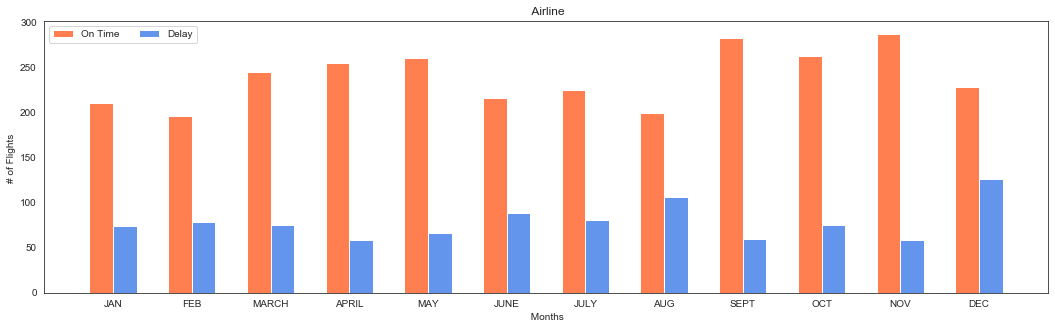

In [561]:
airline(B6)

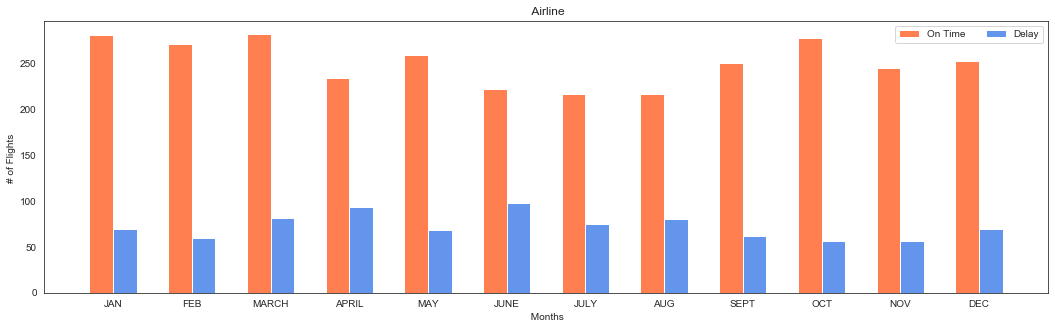

In [562]:
airline(AA)

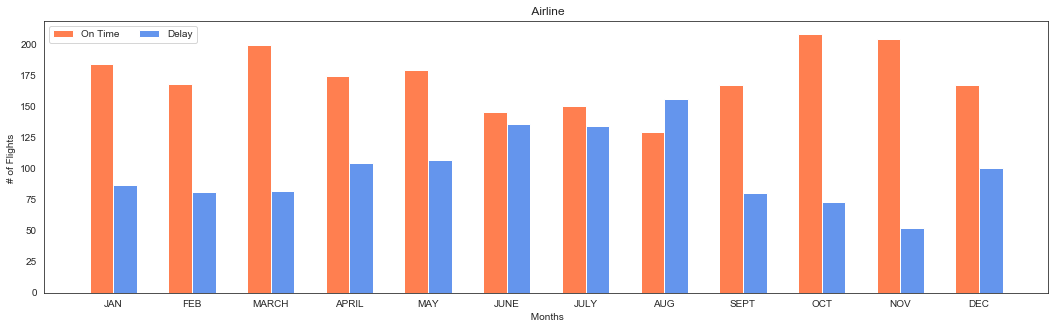

In [563]:
airline(DL)

In [564]:
AUG = DL[DL['MONTH'] == 8] 

In [565]:
AUG['class'].value_counts()

2    156
3    129
Name: class, dtype: int64

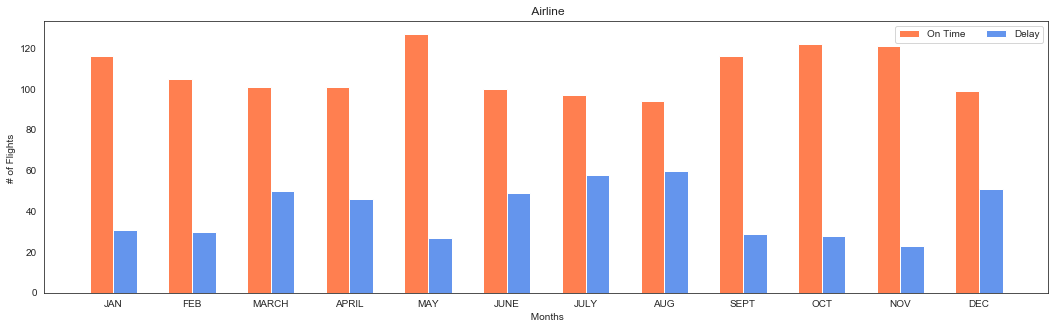

In [566]:
airline(AS)

# American Airline

In [275]:
AA

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
61,1,1,1,2,2019-01-01,AA,255,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,956.0,-4.0,1333.0,-4.0,0.0,371.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
62,1,1,2,3,2019-01-02,AA,255,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,954.0,-6.0,1318.0,-19.0,0.0,345.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
63,1,1,3,4,2019-01-03,AA,255,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,957.0,-3.0,1319.0,-18.0,0.0,356.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
64,1,1,4,5,2019-01-04,AA,255,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1009.0,9.0,1257.0,-40.0,0.0,322.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
65,1,1,5,6,2019-01-05,AA,255,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,959.0,-1.0,1255.0,-42.0,0.0,332.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25134,4,12,27,5,2019-12-27,AA,341,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1500.0,0.0,1841.0,13.0,0.0,368.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25135,4,12,28,6,2019-12-28,AA,341,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1456.0,-4.0,1804.0,-24.0,0.0,339.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25136,4,12,29,7,2019-12-29,AA,341,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1451.0,-9.0,1810.0,-18.0,0.0,334.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25137,4,12,30,1,2019-12-30,AA,341,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1454.0,-6.0,1811.0,-17.0,0.0,329.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


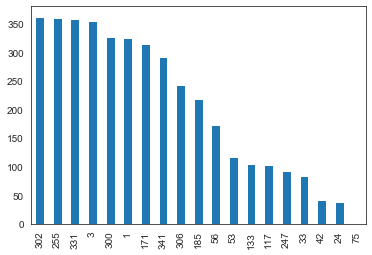

In [905]:
AA['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

Looking into the flight with the longest air time it is an aircraft from American Airlines on November 27 a day before Thanksgiving. The flight was 6 hours and 56 minutes. The reason for the long flight is NAS delay, meaning it was wihtiin control of the National Airspace System.

In [699]:
AA[AA['AIR_TIME']==AA['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
23089,4,11,27,3,2019-11-27,AA,331,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1055.0,-5.0,1539.0,81.0,0.0,416.0,2475.0,0.0,0.0,81.0,0.0,0.0,False,True,False,3,False,False,True,False,False


I decided to look into the flight which had the highest arrival delay. According to this AA flight it was delayed because of an issue within the airline by 13 hours and 33 minutes. Aside of an issue with the airline, there was also a weather delay of 3 hours and 10 minutes making the flight a total of 16 hours and 57 minutes in arrival delay.

In [765]:
AA[AA['ARR_DELAY']==AA['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25063,4,12,18,3,2019-12-18,AA,306,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,943.0,1003.0,1337.0,1017.0,0.0,332.0,2475.0,813.0,190.0,14.0,0.0,0.0,True,False,False,2,True,True,True,False,False


I have identified if a flight is delayed and has an arrival delay of more than 14 minutes it is because of carrier, weather, NAS, security or late aircraft. 

In [711]:
AAdelays = JFK[(JFK['class'] ==2 ) & (JFK['OP_UNIQUE_CARRIER'] =='AA') & (JFK['ARR_DELAY'] > 14)]
AAdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
160,1,1,30,3,2019-01-30,AA,300,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2041.0,11.0,25.0,22.0,0.0,336.0,2475.0,0.0,11.0,11.0,0.0,0.0,True,False,False,2,False,True,True,False,False
166,1,1,6,7,2019-01-06,AA,302,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2014.0,114.0,34.0,161.0,0.0,360.0,2475.0,27.0,0.0,47.0,0.0,87.0,True,False,False,2,True,False,True,False,True
184,1,1,24,4,2019-01-24,AA,302,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1926.0,66.0,2236.0,43.0,0.0,328.0,2475.0,5.0,0.0,0.0,0.0,38.0,True,False,False,2,True,False,False,False,True
226,1,1,7,1,2019-01-07,AA,331,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1106.0,6.0,1435.0,15.0,0.0,357.0,2475.0,6.0,0.0,9.0,0.0,0.0,True,False,False,2,True,False,True,False,False
238,1,1,21,1,2019-01-21,AA,331,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1104.0,4.0,1438.0,18.0,0.0,365.0,2475.0,0.0,4.0,14.0,0.0,0.0,True,False,False,2,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25060,4,12,15,7,2019-12-15,AA,306,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1710.0,10.0,2046.0,22.0,0.0,372.0,2475.0,10.0,0.0,12.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25063,4,12,18,3,2019-12-18,AA,306,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,943.0,1003.0,1337.0,1017.0,0.0,332.0,2475.0,813.0,190.0,14.0,0.0,0.0,True,False,False,2,True,True,True,False,False
25067,4,12,22,7,2019-12-22,AA,306,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1920.0,140.0,2231.0,111.0,0.0,346.0,2475.0,111.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25109,4,12,2,1,2019-12-02,AA,341,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1438.0,8.0,1855.0,67.0,0.0,359.0,2475.0,4.0,0.0,59.0,0.0,4.0,True,False,False,2,True,False,True,False,True


In addition there was one security delay in JFK from a flight headed to LAX. The security delay can be because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

In [448]:
AA[(AA['class'] ==2 )  & (AA['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
5476,1,3,19,2,2019-03-19,AA,171,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,624.0,24.0,1015.0,39.0,0.0,359.0,2475.0,0.0,0.0,15.0,24.0,0.0,True,False,False,2,False,False,True,True,False


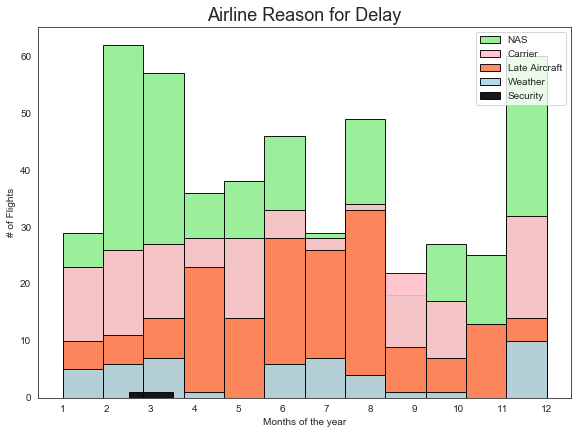

In [690]:
delays(AA)

In [621]:
AA[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          311
delay_weather           48
delay_nas              476
delay_security           1
delay_late_aircraft    202
dtype: int64

In 2019 it seems that a majority of American Airlines delays were because of NAS. The second leading cause of delay is carrier which means the delay was within the airlines control such as maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc). 

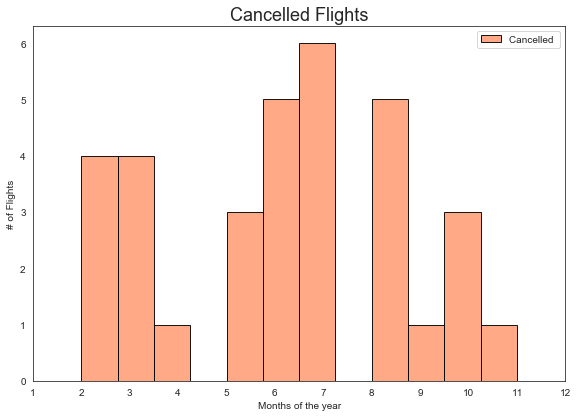

In [688]:
cancellation(AA)

# Alaska Airlines

In [473]:
AS

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
481,1,1,22,2,2019-01-22,AS,1399,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,744.0,29.0,1110.0,30.0,0.0,335.0,2475.0,0.0,29.0,1.0,0.0,0.0,True,False,False,2,False,True,True,False,False
483,1,1,22,2,2019-01-22,AS,1409,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1055.0,0.0,1423.0,3.0,0.0,352.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
485,1,1,22,2,2019-01-22,AS,1413,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1955.0,-10.0,2255.0,-40.0,0.0,336.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
487,1,1,23,3,2019-01-23,AS,31,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1254.0,-6.0,1607.0,-23.0,0.0,352.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
488,1,1,23,3,2019-01-23,AS,57,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,917.0,-13.0,1301.0,1.0,0.0,350.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24924,4,12,31,2,2019-12-31,AS,407,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1657.0,-3.0,1939.0,-56.0,0.0,317.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
24930,4,12,31,2,2019-12-31,AS,991,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1126.0,-4.0,1432.0,-33.0,0.0,324.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
24931,4,12,31,2,2019-12-31,AS,1399,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,728.0,-2.0,1017.0,-48.0,0.0,309.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
24932,4,12,12,4,2019-12-12,AS,229,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2009.0,-6.0,2331.0,-19.0,0.0,347.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


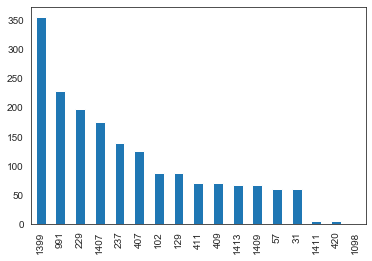

In [906]:
AS['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

The longest flight to LAX from JFK in Alaska Airlines was on Feburary 8. The flight was 412 minutes which is 6 hours and 51 minutes. The reason for the arrival delay was NAS. 

In [703]:
AS[AS['AIR_TIME']==AS['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
3580,1,2,8,5,2019-02-08,AS,31,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1250.0,-10.0,1716.0,36.0,0.0,412.0,2475.0,0.0,0.0,36.0,0.0,0.0,False,True,False,3,False,False,True,False,False


In [764]:
AS[AS['ARR_DELAY']==AS['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
7731,2,4,15,1,2019-04-15,AS,1407,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2221.0,771.0,215.0,805.0,0.0,328.0,2475.0,771.0,0.0,34.0,0.0,0.0,True,False,False,2,True,False,True,False,False


In [478]:
ASdelays = AS[(AS['class'] ==2 ) & (AS['ARR_DELAY'] > 14)]
ASdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
481,1,1,22,2,2019-01-22,AS,1399,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,744.0,29.0,1110.0,30.0,0.0,335.0,2475.0,0.0,29.0,1.0,0.0,0.0,True,False,False,2,False,True,True,False,False
495,1,1,23,3,2019-01-23,AS,1413,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2249.0,164.0,211.0,156.0,0.0,346.0,2475.0,156.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
505,1,1,24,4,2019-01-24,AS,1413,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2039.0,34.0,2359.0,24.0,0.0,330.0,2475.0,0.0,0.0,0.0,0.0,24.0,True,False,False,2,False,False,False,False,True
618,1,1,27,7,2019-01-27,AS,1413,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2012.0,7.0,2353.0,18.0,0.0,353.0,2475.0,7.0,0.0,11.0,0.0,0.0,True,False,False,2,True,False,True,False,False
698,1,1,16,3,2019-01-16,AS,1399,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,825.0,70.0,1220.0,100.0,0.0,352.0,2475.0,70.0,0.0,30.0,0.0,0.0,True,False,False,2,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24861,4,12,24,2,2019-12-24,AS,1399,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,859.0,89.0,1225.0,80.0,0.0,339.0,2475.0,80.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
24863,4,12,25,3,2019-12-25,AS,237,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1606.0,181.0,1926.0,166.0,0.0,351.0,2475.0,166.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
24864,4,12,25,3,2019-12-25,AS,407,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1732.0,32.0,2112.0,37.0,0.0,365.0,2475.0,32.0,0.0,5.0,0.0,0.0,True,False,False,2,True,False,True,False,False
24881,4,12,26,4,2019-12-26,AS,1399,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,743.0,13.0,1121.0,16.0,0.0,338.0,2475.0,0.0,13.0,3.0,0.0,0.0,True,False,False,2,False,True,True,False,False


Alska Airlines had two security delays in 2019. One delay which resulted in the flight arriving over 2 hours later than expected.

In [480]:
AS[(AS['class'] ==2 )  & (AS['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
18056,3,9,26,4,2019-09-26,AS,409,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1352.0,142.0,1654.0,139.0,0.0,323.0,2475.0,0.0,0.0,0.0,139.0,0.0,True,False,False,2,False,False,False,True,False
18432,3,9,9,1,2019-09-09,AS,1399,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,835.0,55.0,1112.0,27.0,0.0,311.0,2475.0,0.0,0.0,0.0,27.0,0.0,True,False,False,2,False,False,False,True,False


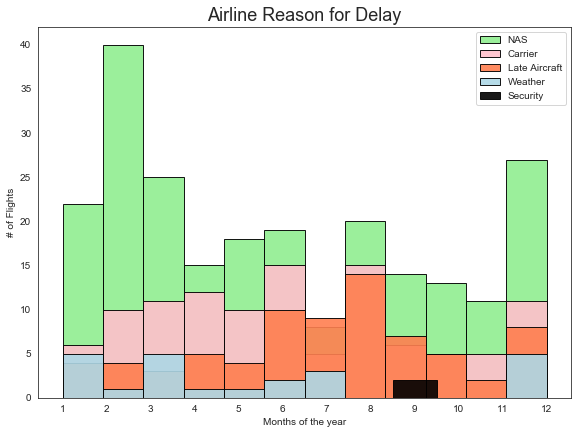

In [630]:
delays(AS)

In [616]:
AS[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          111
delay_weather           23
delay_nas              232
delay_security           2
delay_late_aircraft     75
dtype: int64

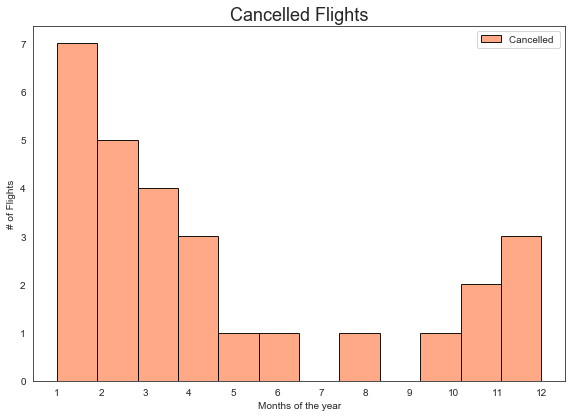

In [687]:
cancellation(AS)

In [ ]:
talk about the delay graph and cancellation 

# JetBlue

In [700]:
B6

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
1,1,1,24,4,2019-01-24,B6,1323,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1523.0,-5.0,1832.0,-35.0,0.0,336.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
3,1,1,24,4,2019-01-24,B6,1523,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1658.0,26.0,1959.0,-6.0,0.0,333.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
4,1,1,24,4,2019-01-24,B6,1623,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2107.0,83.0,23.0,66.0,0.0,335.0,2475.0,1.0,0.0,0.0,0.0,65.0,True,False,False,2,True,False,False,False,True
5,1,1,24,4,2019-01-24,B6,1723,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2317.0,97.0,326.0,137.0,0.0,344.0,2475.0,0.0,0.0,40.0,0.0,97.0,True,False,False,2,False,False,True,False,True
6,1,1,24,4,2019-01-24,B6,1823,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2237.0,-3.0,215.0,10.0,0.0,343.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25653,4,12,30,1,2019-12-30,B6,1923,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,925.0,-4.0,1236.0,-23.0,0.0,324.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25655,4,12,30,1,2019-12-30,B6,2123,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1440.0,131.0,1755.0,121.0,0.0,335.0,2475.0,121.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25658,4,12,31,2,2019-12-31,B6,23,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,520.0,-10.0,823.0,-33.0,0.0,335.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25660,4,12,31,2,2019-12-31,B6,123,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,651.0,-9.0,1015.0,-18.0,0.0,321.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


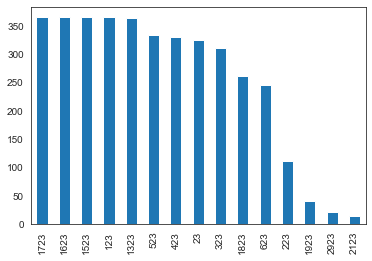

In [908]:
B6['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

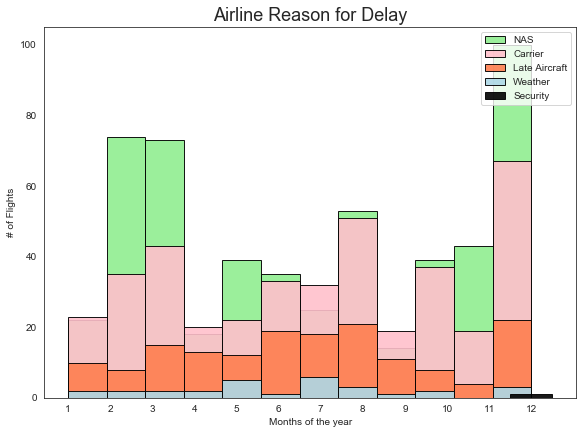

In [772]:
delays(B6)

In [773]:
B6[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          401
delay_weather           29
delay_nas              535
delay_security           1
delay_late_aircraft    161
dtype: int64

In [701]:
B6[B6['AIR_TIME']==B6['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
24294,4,12,4,3,2019-12-04,B6,223,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,754.0,-6.0,1202.0,46.0,0.0,404.0,2475.0,0.0,0.0,46.0,0.0,0.0,False,True,False,3,False,False,True,False,False


In [763]:
B6[B6['ARR_DELAY']==B6['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
13977,3,7,6,6,2019-07-06,B6,623,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,140.0,701.0,450.0,702.0,0.0,338.0,2475.0,701.0,0.0,1.0,0.0,0.0,True,False,False,2,True,False,True,False,False


In [720]:
B6delays = B6[(B6['class'] ==2 ) & (B6['ARR_DELAY'] > 14)]
B6delays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
4,1,1,24,4,2019-01-24,B6,1623,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2107.0,83.0,23.0,66.0,0.0,335.0,2475.0,1.0,0.0,0.0,0.0,65.0,True,False,False,2,True,False,False,False,True
5,1,1,24,4,2019-01-24,B6,1723,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2317.0,97.0,326.0,137.0,0.0,344.0,2475.0,0.0,0.0,40.0,0.0,97.0,True,False,False,2,False,False,True,False,True
313,1,1,5,6,2019-01-05,B6,1723,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2211.0,31.0,133.0,24.0,0.0,355.0,2475.0,24.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
333,1,1,6,7,2019-01-06,B6,1723,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,12.0,152.0,325.0,136.0,0.0,353.0,2475.0,136.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
343,1,1,7,1,2019-01-07,B6,423,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1109.0,3.0,1450.0,20.0,0.0,365.0,2475.0,3.0,0.0,17.0,0.0,0.0,True,False,False,2,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25635,4,12,29,7,2019-12-29,B6,2123,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1437.0,128.0,1741.0,107.0,0.0,335.0,2475.0,107.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
25649,4,12,30,1,2019-12-30,B6,1523,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1908.0,98.0,2237.0,97.0,0.0,319.0,2475.0,70.0,0.0,0.0,0.0,27.0,True,False,False,2,True,False,False,False,True
25650,4,12,30,1,2019-12-30,B6,1623,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1948.0,13.0,2347.0,37.0,0.0,320.0,2475.0,13.0,0.0,24.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25652,4,12,30,1,2019-12-30,B6,1823,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,39.0,119.0,330.0,79.0,0.0,325.0,2475.0,79.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False


In [721]:
B6delays.isnull().sum()

QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
OP_UNIQUE_CARRIER      0
OP_CARRIER_FL_NUM      0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
ORIGIN_CITY_NAME       0
ORIGIN_STATE_ABR       0
ORIGIN_STATE_NM        0
DEST_AIRPORT_ID        0
DEST                   0
DEST_CITY_NAME         0
DEST_STATE_ABR         0
DEST_STATE_NM          0
DEP_TIME               0
DEP_DELAY              0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
delayed                0
ontime                 0
cancel                 0
class                  0
delay_carrier          0
delay_weather          0
delay_nas              0
delay_security         0
delay_late_aircraft    0
dtype: int64

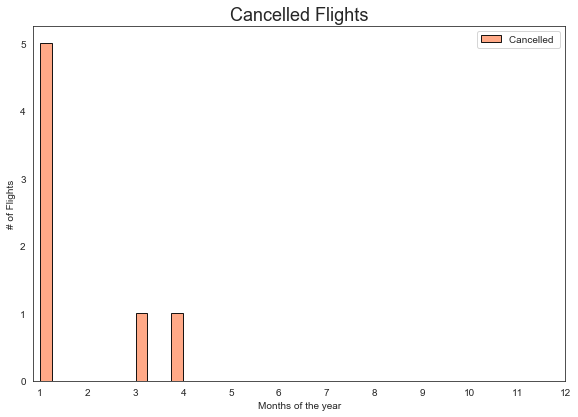

In [724]:
cancellation(B6)

# Delta Airlines

In [725]:
DL

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
406,1,1,18,5,2019-01-18,DL,41,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1653.0,-6.0,1956.0,-24.0,0.0,339.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
407,1,1,18,5,2019-01-18,DL,305,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1409.0,14.0,1716.0,-10.0,0.0,333.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
409,1,1,18,5,2019-01-18,DL,1657,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,815.0,0.0,1134.0,-21.0,0.0,329.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
410,1,1,18,5,2019-01-18,DL,1666,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,953.0,-2.0,1321.0,-4.0,0.0,327.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
411,1,1,18,5,2019-01-18,DL,1710,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,710.0,10.0,1049.0,30.0,0.0,337.0,2475.0,10.0,0.0,20.0,0.0,0.0,True,False,False,2,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,4,12,12,4,2019-12-12,DL,427,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1926.0,1.0,2248.0,-11.0,0.0,344.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
25301,4,12,12,4,2019-12-12,DL,428,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1654.0,-1.0,2005.0,-15.0,0.0,337.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25302,4,12,12,4,2019-12-12,DL,447,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1801.0,1.0,2112.0,-18.0,0.0,341.0,2475.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
25303,4,12,12,4,2019-12-12,DL,453,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1337.0,-3.0,1703.0,0.0,0.0,349.0,2475.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False


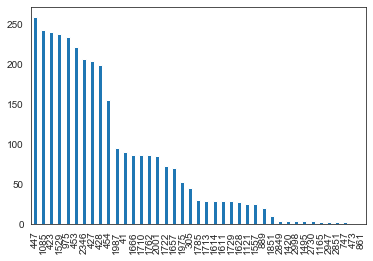

In [909]:
DL['OP_CARRIER_FL_NUM'].value_counts().plot(kind='bar')

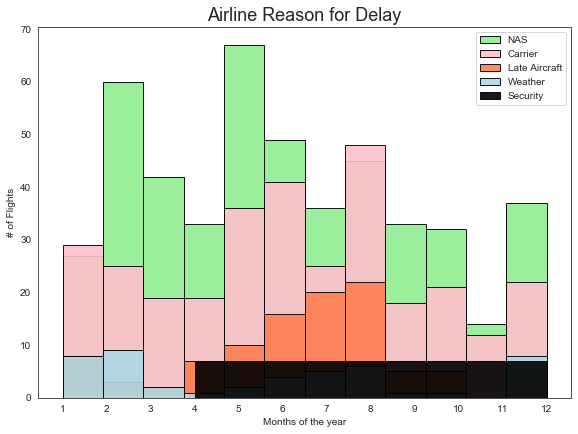

In [768]:
delays(DL)

In [769]:
DL[['delay_carrier','delay_weather','delay_nas','delay_security','delay_late_aircraft']].sum()

delay_carrier          315
delay_weather           47
delay_nas              475
delay_security           7
delay_late_aircraft    101
dtype: int64

The Delta flight 975 on November 27, a day before Thanksgiving had the longest air time in 2019. Aside from the flight being delayed because of NAS reason, the airline also had a carrier issue.  

In [726]:
DL[DL['AIR_TIME']==DL['AIR_TIME'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
23044,4,11,27,3,2019-11-27,DL,975,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1606.0,36.0,2043.0,110.0,0.0,406.0,2475.0,36.0,0.0,74.0,0.0,0.0,True,False,False,2,True,False,True,False,False


The flight that had the longest arrival delay to LAX in 2019 was because of issues wihtin the airline. This delta airline was delayed for 18 hours and 58 minutes.  

In [766]:
DL[DL['ARR_DELAY']==DL['ARR_DELAY'].max()]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
16843,3,8,22,4,2019-08-22,DL,975,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1107.0,1177.0,1348.0,1138.0,0.0,303.0,2475.0,1138.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False


Surprisingly, Delta had 7 flights that were delayed due to security reasons. 

In [771]:
DL[(DL['class'] ==2 )  & (DL['SECURITY_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
8401,2,4,25,4,2019-04-25,DL,1628,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,828.0,88.0,1117.0,57.0,0.0,321.0,2475.0,0.0,0.0,0.0,57.0,0.0,True,False,False,2,False,False,False,True,False
10082,2,5,25,6,2019-05-25,DL,453,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1608.0,138.0,1930.0,156.0,0.0,339.0,2475.0,0.0,0.0,18.0,138.0,0.0,True,False,False,2,False,False,True,True,False
11407,2,6,20,4,2019-06-20,DL,427,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2049.0,94.0,8.0,73.0,0.0,314.0,2475.0,31.0,0.0,0.0,42.0,0.0,True,False,False,2,True,False,False,True,False
13258,3,7,1,1,2019-07-01,DL,975,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1612.0,42.0,1911.0,21.0,0.0,333.0,2475.0,0.0,0.0,0.0,21.0,0.0,True,False,False,2,False,False,False,True,False
15846,3,8,8,4,2019-08-08,DL,1085,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1254.0,175.0,1531.0,141.0,0.0,309.0,2475.0,0.0,0.0,0.0,52.0,89.0,True,False,False,2,False,False,False,True,True
16853,3,8,19,1,2019-08-19,DL,423,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1313.0,88.0,1604.0,73.0,0.0,314.0,2475.0,0.0,0.0,0.0,73.0,0.0,True,False,False,2,False,False,False,True,False
24673,4,12,4,3,2019-12-04,DL,428,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1816.0,81.0,2133.0,73.0,0.0,341.0,2475.0,0.0,0.0,0.0,73.0,0.0,True,False,False,2,False,False,False,True,False


In [731]:
DLdelays = DL[(DL['class'] ==2 ) & (DL['ARR_DELAY'] > 14)]
DLdelays

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
411,1,1,18,5,2019-01-18,DL,1710,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,710.0,10.0,1049.0,30.0,0.0,337.0,2475.0,10.0,0.0,20.0,0.0,0.0,True,False,False,2,True,False,True,False,False
421,1,1,18,5,2019-01-18,DL,1987,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2216.0,51.0,132.0,46.0,0.0,349.0,2475.0,19.0,0.0,0.0,0.0,27.0,True,False,False,2,True,False,False,False,True
422,1,1,18,5,2019-01-18,DL,2001,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2022.0,137.0,2322.0,112.0,0.0,321.0,2475.0,112.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
443,1,1,13,7,2019-01-13,DL,1666,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1249.0,174.0,1528.0,123.0,0.0,308.0,2475.0,123.0,0.0,0.0,0.0,0.0,True,False,False,2,True,False,False,False,False
477,1,1,24,4,2019-01-24,DL,1987,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2254.0,89.0,228.0,102.0,0.0,342.0,2475.0,0.0,0.0,29.0,0.0,73.0,True,False,False,2,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,4,12,15,7,2019-12-15,DL,427,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1949.0,24.0,2335.0,36.0,0.0,364.0,2475.0,24.0,0.0,12.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25213,4,12,8,7,2019-12-08,DL,427,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1945.0,20.0,2321.0,22.0,0.0,350.0,2475.0,20.0,0.0,2.0,0.0,0.0,True,False,False,2,True,False,True,False,False
25246,4,12,30,1,2019-12-30,DL,427,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,2035.0,70.0,2359.0,55.0,0.0,306.0,2475.0,11.0,0.0,0.0,0.0,44.0,True,False,False,2,True,False,False,False,True
25288,4,12,11,3,2019-12-11,DL,1085,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1005.0,20.0,1426.0,76.0,0.0,351.0,2475.0,20.0,0.0,56.0,0.0,0.0,True,False,False,2,True,False,True,False,False


Delta has no cancelled flights. One of Delta's policy is they prefer not to cancel flights instead thye will wait out the reason 

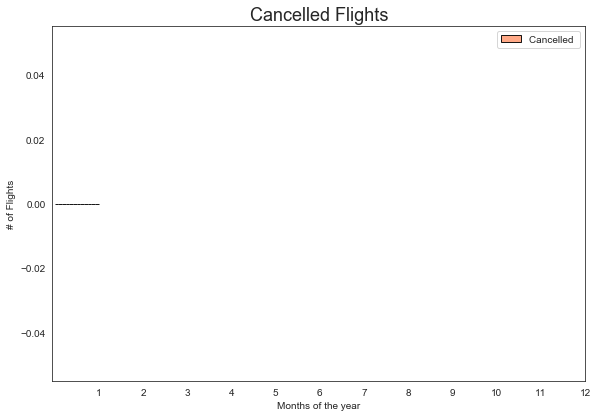

In [737]:
cancellation(DL)

In conclusion, if your Delta flight was delayed and it was due to problems that the airline could correct, you are eligible for compensation. Make sure to follow the right procedure and get support if you need any.



# Holiday Delays

In [883]:
delay = JFK[JFK['ARR_DELAY'] > 13].groupby(['OP_UNIQUE_CARRIER']).count()
delay

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,654,654,654,654,654,680,680,680,680,680,680,680,680,680
AS,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,328,328,328,328,328,339,339,339,339,339,339,339,339,339
B6,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,734,734,734,734,734,766,766,766,766,766,766,766,766,766
DL,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,673,652,652,652,652,652,673,673,673,673,673,673,673,673,673


In [893]:
JFK[JFK['ARR_DELAY'] > 14].groupby(['FL_DATE']).size()

FL_DATE
2019-01-01    10
2019-01-02     3
2019-01-03     2
2019-01-05     2
2019-01-06     9
              ..
2019-12-26     6
2019-12-27     1
2019-12-28     1
2019-12-29     3
2019-12-30     8
Length: 341, dtype: int64

In [892]:
JFK[(JFK['FL_DATE'] =='2019-11-27' ) & (JFK['ARR_DELAY'] > 20)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
21584,4,11,27,3,2019-11-27,AA,255,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,855.0,-5.0,1250.0,22.0,0.0,383.0,2475.0,0.0,0.0,22.0,0.0,0.0,False,True,False,3,False,False,True,False,False
21722,4,11,27,3,2019-11-27,AA,306,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1720.0,20.0,2113.0,49.0,0.0,379.0,2475.0,20.0,0.0,29.0,0.0,0.0,True,False,False,2,True,False,True,False,False
21752,4,11,27,3,2019-11-27,B6,1923,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,927.0,-8.0,1314.0,23.0,0.0,379.0,2475.0,0.0,0.0,23.0,0.0,0.0,False,True,False,3,False,False,True,False,False
22095,4,11,27,3,2019-11-27,AS,237,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1304.0,-1.0,1708.0,33.0,0.0,392.0,2475.0,0.0,0.0,33.0,0.0,0.0,False,True,False,3,False,False,True,False,False
22102,4,11,27,3,2019-11-27,AS,991,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1128.0,-2.0,1544.0,44.0,0.0,385.0,2475.0,0.0,0.0,44.0,0.0,0.0,False,True,False,3,False,False,True,False,False
22397,4,11,27,3,2019-11-27,AA,117,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1943.0,14.0,2334.0,29.0,0.0,371.0,2475.0,14.0,0.0,15.0,0.0,0.0,True,False,False,2,True,False,True,False,False
22589,4,11,27,3,2019-11-27,B6,23,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,531.0,-9.0,933.0,42.0,0.0,393.0,2475.0,0.0,0.0,42.0,0.0,0.0,False,True,False,3,False,False,True,False,False
22591,4,11,27,3,2019-11-27,B6,123,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,703.0,-2.0,1122.0,58.0,0.0,394.0,2475.0,0.0,0.0,58.0,0.0,0.0,False,True,False,3,False,False,True,False,False
22595,4,11,27,3,2019-11-27,B6,323,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,830.0,-5.0,1252.0,58.0,0.0,380.0,2475.0,0.0,0.0,58.0,0.0,0.0,False,True,False,3,False,False,True,False,False
22597,4,11,27,3,2019-11-27,B6,423,12478,JFK,"New York, NY",NY,New York,12892,LAX,"Los Angeles, CA",CA,California,1033.0,-2.0,1413.0,24.0,0.0,381.0,2475.0,0.0,0.0,24.0,0.0,0.0,False,True,False,3,False,False,True,False,False


In [813]:

JFK[(JFK['FL_DATE'] =='2019-11-27' ) & (JFK['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()


OP_UNIQUE_CARRIER
AA     7
AS     2
B6    12
DL     5
dtype: int64

In [831]:

JFK[JFK['FL_DATE'] =='2019-12-29'].groupby(['OP_UNIQUE_CARRIER']).size()


OP_UNIQUE_CARRIER
AA     9
AS     5
B6    10
DL     8
dtype: int64

In [836]:
JFK[(JFK['FL_DATE'] =='2019-12-25' ) & (JFK['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()


OP_UNIQUE_CARRIER
AA    3
AS    2
B6    1
DL    1
dtype: int64

In [838]:
JFK[(JFK['FL_DATE'] =='2019-12-30' ) & (JFK['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()


OP_UNIQUE_CARRIER
AA    2
AS    1
B6    4
DL    1
dtype: int64

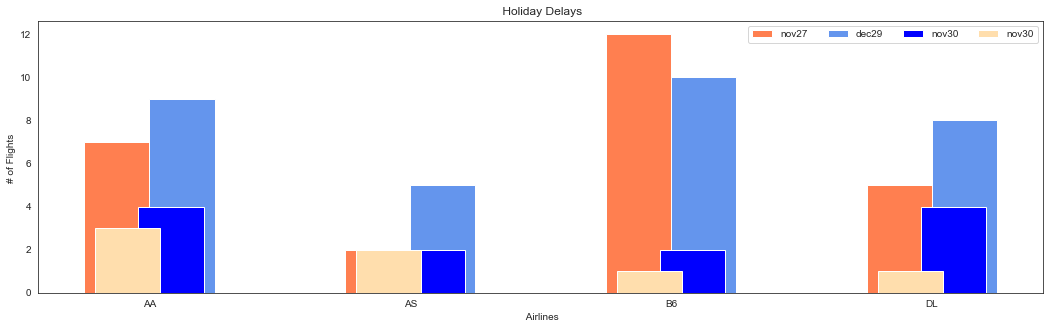

In [868]:
f, ax = plt.subplots(figsize=(18,5)) 

    ### Setting the labels of the X axis
labels = ['AA','AS','B6','DL']

nov27 = JFK[(JFK['FL_DATE'] =='2019-11-27' ) & (JFK['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
dec29 = JFK[JFK['FL_DATE'] =='2019-12-29'].groupby(['OP_UNIQUE_CARRIER']).size()
nov30 = JFK[(JFK['FL_DATE'] =='2019-11-30' ) & (JFK['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
christ = JFK[(JFK['FL_DATE'] =='2019-12-25' ) & (JFK['ARR_DELAY'] > 13)].groupby(['OP_UNIQUE_CARRIER']).size()
    ### X- Label locations 
x = np.arange(len(labels))  
    ### Width of the bars
width = 0.25  
    ### Code to plot the bars 
rect1= ax.bar(x - width/2, nov27, width, label = 'nov27',color = 'coral')
rect2= ax.bar(x + width/2, dec29, width, label = 'dec29',color = 'cornflowerblue')
rect3= ax.bar(x + width/3, nov30, width, label = 'nov30',color = 'blue')
rect4= ax.bar(x - width/3, christ, width, label = 'nov30',color = 'navajowhite')
    ### Set the x-ticks
ax.set_xticks(x)
    ### Setting labels 
ax.set_xticklabels(labels)
    ### Labeling the X axis
ax.set_xlabel(" Airlines")
    ### Y axis Label
ax.set_ylabel("# of Flights ")
    ### Title of Graoh
ax.set_title(" Holiday Delays")
    ### Showing the legend 
ax.legend(ncol=4)
    ### Show graph
plt.show()

In [889]:
JFK[JFK['WEATHER_DELAY'] > 0].groupby(['FL_DATE']).size()


FL_DATE
2019-01-06     1
2019-01-21    11
2019-01-22     1
2019-01-30     4
2019-01-31     3
2019-02-04     1
2019-02-12    10
2019-02-20     7
2019-03-01     3
2019-03-02     6
2019-03-03     2
2019-03-06     1
2019-03-10     1
2019-03-15     3
2019-04-15     2
2019-04-26     3
2019-05-19     1
2019-05-20     1
2019-05-23     2
2019-05-26     1
2019-05-28     2
2019-05-29     1
2019-06-02     1
2019-06-13     1
2019-06-20     3
2019-06-25     4
2019-06-29     4
2019-07-06     3
2019-07-11     1
2019-07-16     1
2019-07-17     8
2019-07-22     8
2019-08-07     4
2019-08-19     3
2019-08-21     2
2019-08-22     4
2019-09-02     2
2019-09-04     1
2019-10-16     1
2019-10-18     1
2019-10-31     2
2019-12-01     4
2019-12-02     7
2019-12-03     4
2019-12-11     1
2019-12-17     1
2019-12-18     8
2019-12-26     1
dtype: int64